In [3]:
import pickle
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from sklearn.neural_network import MLPClassifier
from PIL import Image
import seaborn as sns
import cv2
import matplotlib.image as mpimg 

# Just to make sure all the out puts get printed in individual jupyter cells
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:


cnt=0

pics = np.zeros((15474,64,64,3), dtype='uint32')
for i in range(15474):

    sample=cv2.imread('pics/' + str(i) + '.jpg')
    imgs=cv2.resize(sample, (64,64))
    pics[cnt] = imgs
    cnt+=1

print("No. of images: ",cnt)

No. of images:  15474


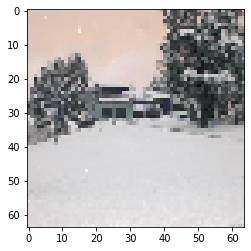

In [5]:

plt.imshow(pics[15])

In [6]:
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv('desc.csv', index_col=0)




data['alt_bath'] = data['bath'].apply(lambda x : int((10 * x % 10)) ) 
data['bath'] = data['bath'].apply(lambda x : int(x))


data['street_type'] = data['street'].apply(lambda x : x.split(' ')[-1])
data['city_type'] = data['city'].apply(lambda x : x.split(' ')[-2][:-1])


city_types = list(data['city_type'].value_counts()[:20].keys())
street_types = list(data['street_type'].value_counts()[:20].keys())
data['street_type'] = data['street_type'].apply(lambda x : x if x in street_types else "Other")
data['city_type'] = data['city_type'].apply(lambda x : x if x in city_types else "Other")

data['plate'] = data['street'].apply(lambda x : int(x[:x.index(' ')]) if (   
                                                                          x[:x.index(' ')] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0'] ) 
                                                                          else 10000 ) 

data

,street,city,n_city,bed,bath,sqft,price,alt_bath,street_type,city_type,plate
image_id,,,,,,,,,,,
15023,0 H Street,"Oxnard, CA",261,3,2,1653,575000,1,Street,Other,0
18,0 Oak Creek rd,"Tehachapi, CA",367,4,1,1980,1995000,1,Other,Other,0
11768,0000 Roadrunner Ridge,"Valley Center, CA",384,2,1,1045,460000,0,Other,Other,10000
3263,1 Anapamu Street,"Ladera Ranch, CA",177,4,4,3700,1595000,1,Street,Other,1
3055,1 Flintridge Avenue,"Ladera Ranch, CA",177,6,4,3100,1075000,0,Avenue,Other,1
...,...,...,...,...,...,...,...,...,...,...,...
13174,Address not provided,"Carlsbad, CA",67,3,2,1999,805990,1,Other,Other,10000
15207,Address not provided,"Camarillo, CA",59,4,3,2200,709000,0,Other,Other,10000
13526,Address not provided,"Atascadero, CA",21,3,3,2000,1675000,0,Other,Other,10000


In [7]:
data = data.drop(['street', 'city'], axis=1)
data = pd.get_dummies(data, columns=['street_type', 'city_type'])




In [8]:
# for classification model

#data['price'] = data['price'].apply(lambda x : (x - 195000) // 50000)
#data['price'] = data['price'].apply(lambda x : [(1 if i == x else 0) for i in range(37)])

# y = []
# tempList = list(data['price'])
# for i in range(len(tempList)) :
#     tmp = [ 0 for i in range(37) ]
#     tmp[tempList[i]] = 1
#     y.append(tmp)
# del tempList
# y[0] #575k

In [9]:
ids = list(data.index)
pic_col = []
for i in ids : 
    pic_col.append(pics[i])
data['pics'] = pic_col

In [10]:
y = data['price']
x = data.drop(['price'], axis=1)


In [11]:
y = np.asarray(y)
y.shape

(15474,)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing



x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=50)


In [13]:

pics_train = x_train['pics']
pics_valid = x_valid['pics']
x_train.drop(['pics'], axis=1, inplace=True)
x_valid.drop(['pics'], axis=1, inplace=True)



y_train = np.array(y_train).reshape((len(y_train), 1))
y_valid = np.array(y_valid).reshape((len(y_valid), 1))

min_max_scaler = preprocessing.MinMaxScaler()
y_train = min_max_scaler.fit_transform(y_train)
y_valid = min_max_scaler.fit_transform(y_valid)
x_train = min_max_scaler.fit_transform(x_train)
x_valid = min_max_scaler.fit_transform(x_valid)

In [36]:
pics_valid = np.asarray(pics_valid)
pics_train = np.asarray(pics_train)

In [75]:
valid_p = np.zeros((3095, 64, 64, 3))
for i in range(3095) : 
    valid_p[i] = pics_valid[i]
valid_p.shape

train_p = np.zeros((12379, 64, 64, 3))
for i in range(12379) : 
    train_p[i] = pics_train[i]
train_p.shape

#del pics_train, pics_valid

(3095, 64, 64, 3)

(12379, 64, 64, 3)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
cnn_input_layer (InputLayer)    [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_98 (Conv2D)              (None, 32, 32, 6)    168         cnn_input_layer[0][0]            
__________________________________________________________________________________________________
conv2d_99 (Conv2D)              (None, 16, 16, 12)   660         conv2d_98[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_49 (MaxPooling2D) (None, 8, 8, 12)     0           conv2d_99[0][0]                  
______________________________________________________________________________________________

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

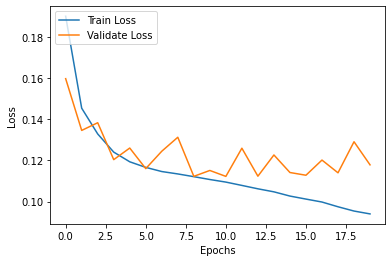

In [138]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Dense, Dropout, concatenate, Input, Flatten, MaxPool2D
from tensorflow.keras import optimizers


############ sorry, but i didnt put all the variations i spoke of in the actual code that i emailed, it tool a lot of space and was messy, and there were not any ############ insane improvement on them so the code below is the last network i was trying...
#ANN
input_layer = Input(shape=(48), name ="input_layer")
hidden_layer2_0 = Dense(36 ,activation='tanh' , name="hidden_layer20")(input_layer)
hidden_layer2_1 = Dense(16 ,activation='tanh' , name="hidden_layer21")(hidden_layer2_0)
#hidden_layer2_2 = Dense(8 ,activation='tanh' , name="hidden_layer22")(hidden_layer2_1)
hidden_layer3 = Dense(1 ,activation='relu' , name="hidden_layer3")(hidden_layer2_1) 

#CNN
cnn_input_layer = Input(shape=(64, 64, 3), name='cnn_input_layer')
cnn_layer1 = Conv2D(6, (3, 3), strides=(2, 2), padding="same", input_shape=(64, 64, 3), activation='tanh')(cnn_input_layer)
cnn_layer2 = Conv2D(12, (3, 3), strides=(2, 2), padding="same", activation='tanh')(cnn_layer1)
pool_layer1 = MaxPool2D(pool_size=(2, 2), strides=None, padding="valid")(cnn_layer2)
flatten_layer = Flatten()(pool_layer1)
#ANN of CNN
hidden_layer4_1 = Dense(128 ,activation='tanh' , name="hidden_layer4_1")(flatten_layer)
hidden_layer4_2 = Dense(32 ,activation='tanh' , name="hidden_layer4_2")(hidden_layer4_1)
hidden_layer5 = Dense(8 ,activation='tanh' , name="hidden_layer5")(hidden_layer4_2) 
hidden_layer6 = Dense(1 ,activation='relu' , name="hidden_layer6")(hidden_layer5) 


concat_layer = concatenate([input_layer, hidden_layer6])
hidden_layer7 = Dense(48 ,activation='tanh' , name="hidden_layer7")(concat_layer)
hidden_layer8 = Dense(22 ,activation='tanh' , name="hidden_layer8")(hidden_layer7)
hidden_layer10 = Dense(10 ,activation='tanh' , name="hidden_layer10")(hidden_layer8)
hidden_layer11 = Dense(1 ,activation='relu' , name="hidden_layer11")(hidden_layer10)



# #ANN 2
# hidden_layer12_0 = Dense(36 ,activation='tanh' , name="hidden_layer20")(input_layer)
# hidden_layer12_1 = Dense(16 ,activation='tanh' , name="hidden_layer21")(hidden_layer12_0)
# hidden_layer12_2 = Dense(8 ,activation='tanh' , name="hidden_layer22")(hidden_layer12_1)
# hidden_layer13 = Dense(1 ,activation='relu' , name="hidden_layer3")(hidden_layer12_2) 

# concat_layer1 = concatenate([hidden_layer12_2, hidden_layer8])
# #hidden_layer17 = Dense(2 ,activation='tanh' , name="hidden_layer7")(concat_layer1)
# hidden_layer18 = Dense(1 ,activation='linear' , name="hidden_layer8")(concat_layer1)




model = Model(inputs=[input_layer, cnn_input_layer], outputs=[hidden_layer11], name='model')
model.summary()
opt = optimizers.RMSprop(learning_rate = 0.0002)
model.compile(loss='mae', optimizer=opt, metrics=['accuracy'])
history = model.fit( x=(x_train, train_p), y=y_train ,validation_data=((x_valid, valid_p),y_valid), epochs=20, batch_size = 128)




# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])

# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend(['Train Acc', 'Validate Acc'], loc='upper left')
# plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Validate Loss'], loc='upper left')
plt.show()

In [122]:
pred = model.predict((x_valid, valid_p))

<Figure size 288x288 with 0 Axes>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Real Price : 282\n Error : 21')

(-0.5, 63.5, 63.5, -0.5)

Text(0.5, 1.0, 'Real Price : 337\n Error : -40')

(-0.5, 63.5, 63.5, -0.5)

Text(0.5, 1.0, 'Real Price : 149\n Error : 162')

(-0.5, 63.5, 63.5, -0.5)

Text(0.5, 1.0, 'Real Price : 171\n Error : -49')

(-0.5, 63.5, 63.5, -0.5)

Text(0.5, 1.0, 'Real Price : 336\n Error : 12')

(-0.5, 63.5, 63.5, -0.5)

Text(0.5, 1.0, 'Real Price : 492\n Error : 92')

(-0.5, 63.5, 63.5, -0.5)

Text(0.5, 1.0, 'Real Price : 542\n Error : 60')

(-0.5, 63.5, 63.5, -0.5)

Text(0.5, 1.0, 'Real Price : 780\n Error : -311')

(-0.5, 63.5, 63.5, -0.5)

Text(0.5, 1.0, 'Real Price : 392\n Error : 28')

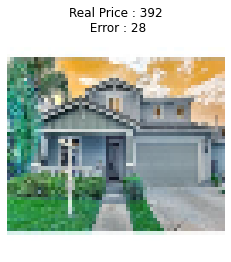

In [160]:
import matplotlib.gridspec as gridspec
#v1 final loss = 221479 / 236307

scaler = data['price'].max() / 1000

plt.figure(figsize = (4,4)) # 10 10


for i in range(9): # 4
    j = random.randint(0, len(pred))
    error = (np.mean(pred[j]) - y_valid[j]) * scaler
    real = y_valid[j] * scaler
    plt.axis('off')
    plt.title( 'Real Price : ' + str(int(real)) + '\n Error : ' + str(int(error)) )
    #plt.subplot(pics_train[j])
    plt.imshow(pics_train[j])
    plt.savefig(str(j)+'.png')
    

plt.show()


<Figure size 1224x1008 with 0 Axes>

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
# weights = network.get_weights()

# import pickle
# try:
#     fpkl= open('weightsFile', 'wb')    #Python 3     
#     pickle.dump(weights, fpkl, protocol= pickle.HIGHEST_PROTOCOL)
#     fpkl.close()
# except:
#     fpkl= open('weightsFile', 'w')    #Python 2      
#     pickle.dump(weights, fpkl, protocol= pickle.HIGHEST_PROTOCOL)
#     fpkl.close()